# HW1 Deep learning

# 3    Simple Classification

We create a linear classifier based on Neural Networks to classify images into three possible categories (i.e. rectangle, disk, triangle). As described in class, the goal will be to create a classifier that will learn the parameters W and b defining the probability to belong to each classe.

In [1]:
from mp1 import *
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential,clone_model
from keras.layers import UpSampling2D,Dense, Activation,Convolution2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Conv2D

from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1



Using TensorFlow backend.


In [9]:

[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [32]:
############ ADAM Calssifier #############

Y_train_categorical = keras.utils.to_categorical(Y_train)
#Parameters
nb_of_classes = 3

#Create linear model
model =Sequential()

model.add(Dense(nb_of_classes,input_shape=(X_train.shape[1],),activation = 'softmax'))

#Compile the mode 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['acc']) 

#Fit the model
historyadam= model.fit(X_train[0:200],Y_train_categorical[0:200],validation_data=(X_train[200:300], Y_train_categorical[200:300]),epochs=50,batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 2.3631 - acc: 0.3250 - val_loss: 1.6297 - val_acc: 0.4200
Epoch 2/50
200/200 [==============================] - 0s 224us/step - loss: 1.1985 - acc: 0.4550 - val_loss: 0.6954 - val_acc: 0.7100
Epoch 3/50
200/200 [==============================] - 0s 188us/step - loss: 0.8030 - acc: 0.5550 - val_loss: 0.5974 - val_acc: 0.6800
Epoch 4/50
200/200 [==============================] - 0s 214us/step - loss: 0.5934 - acc: 0.7350 - val_loss: 0.7710 - val_acc: 0.6000
Epoch 5/50
200/200 [==============================] - 0s 274us/step - loss: 0.5386 - acc: 0.7300 - val_loss: 0.4240 - val_acc: 0.8400
Epoch 6/50
200/200 [==============================] - 0s 322us/step - loss: 0.4174 - acc: 0.7950 - val_loss: 0.3591 - val_acc: 0.8800
Epoch 7/50
200/200 [==============================] - 0s 202us/step - loss: 0.3679 - acc: 0.8400 - val_loss: 0.3326 - val_acc: 0.8700
Epoch 8/50
200/200

In [37]:
############ SGD Calssifier #############
#Create linear model
modelsgd =Sequential()

modelsgd.add(Dense(nb_of_classes,input_shape=(X_train.shape[1],),activation = 'softmax'))

#Compile the mode 
modelsgd.compile(loss = 'categorical_crossentropy', optimizer = 'sgd',metrics=['acc']) 

#Fit the model
historysgd= modelsgd.fit(X_train[0:200],Y_train_categorical[0:200],validation_data=(X_train[200:300], Y_train_categorical[200:300]),epochs=50,batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 9.0500 - acc: 0.3350 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 2/50
200/200 [==============================] - 0s 146us/step - loss: 9.7514 - acc: 0.3950 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 3/50
200/200 [==============================] - 0s 168us/step - loss: 9.7514 - acc: 0.3950 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 4/50
200/200 [==============================] - 0s 170us/step - loss: 9.7514 - acc: 0.3950 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 5/50
200/200 [==============================] - 0s 174us/step - loss: 9.7514 - acc: 0.3950 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 6/50
200/200 [==============================] - 0s 179us/step - loss: 9.7514 - acc: 0.3950 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 7/50
200/200 [==============================] - 0s 184us/step - loss: 9.7514 - acc: 0.3950 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 8/50


In [38]:

def plot_acc_loss(history, optimizer):

    # summarize history for accuracy
    plt.figure(1)  
    plt.figure(figsize=(16,3))
    plt.subplot(121)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy for '+ optimizer )
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
   
    # summarize history for loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for '+ optimizer)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


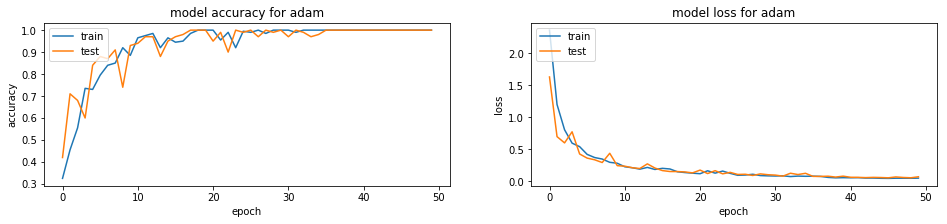

In [39]:
plot_acc_loss(historyadam,'adam')

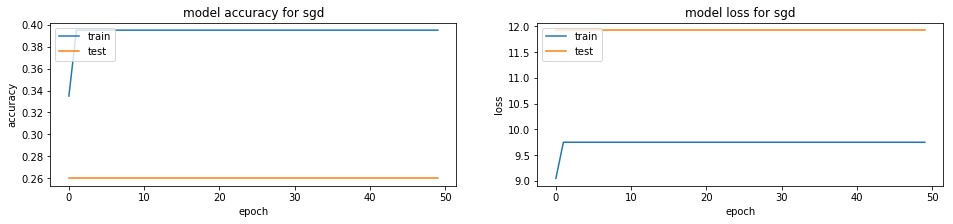

In [40]:
plot_acc_loss(historysgd,'sgd')

We can easily notice that the Adam optimizer performs quite well and even outperforms the other method SGD in our test with the default parameters. In fact, Adam requires less tuning than the other methods. 
If we look at the loss and accuracy evolutnion through epoches, we can see that the sgd based model is not behaving well. On the other hand, the Adam based model fits well the training data, however it doesn’t perform well on test data. The test accuracy is low and the test loss is big. This can be explained by the fact that the model is quite simple and that the training data doesn’t contain free location object while test data contains free location object. 
There is a something in the data unexeplained by the model.

We can check our classifier for all 3 classes

In [41]:
X_test_r = generate_a_rectangle()
X_test_d = generate_a_disk()
X_test_t = generate_a_triangle()[0]
X_test_r = X_test_r.reshape(1, X_test_r.shape[0])
X_test_d = X_test_d.reshape(1, X_test_d.shape[0])
X_test_t = X_test_t.reshape(1, X_test_t.shape[0])
print(model.predict(X_test_r))
print(model.predict(X_test_d))
print(model.predict(X_test_t))

[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


# 3 Visualization of the Solution

Text(0.5,1,'3rd column : triangle')

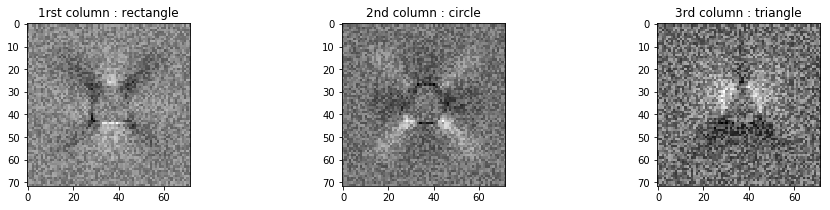

In [43]:

W,b = model.get_weights()
size=int(np.sqrt(W.shape[0]))
plt.figure(1)
plt.figure(figsize=(16,3))
plt.subplot(131)
plt.imshow(W[:,0].reshape(size,size), cmap='gray')
plt.title('1rst column : rectangle')

plt.subplot(132)
plt.imshow(W[:,1].reshape(size,size), cmap='gray')
plt.title('2nd column : circle')

plt.subplot(133)
plt.imshow(W[:,2].reshape(size,size), cmap='gray')
plt.title('3rd column : triangle')





# 4 A More Difficult Classification Problem

In [44]:
nb_of_classes = 3
#Create linear model
model =Sequential()
model.add(Dense(nb_of_classes,input_shape=(X_train.shape[1],),activation = 'softmax'))
#Compile the mode 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy']) 
#Fit the model
historyadam= model.fit(X_train,Y_train_categorical,validation_data=(X_test,Y_test),epochs=100,batch_size=32)
print('Linear Model score: ',model.evaluate(X_test, Y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 1.4169 - acc: 0.4867 - val_loss: 1.6721 - val_acc: 0.3233
Epoch 2/100
300/300 [==============================] - 0s 158us/step - loss: 0.9117 - acc: 0.5367 - val_loss: 1.5871 - val_acc: 0.3367
Epoch 3/100
300/300 [==============================] - 0s 210us/step - loss: 0.5691 - acc: 0.7700 - val_loss: 1.5874 - val_acc: 0.3300
Epoch 4/100
300/300 [==============================] - 0s 246us/step - loss: 0.4025 - acc: 0.8833 - val_loss: 1.7921 - val_acc: 0.2633
Epoch 5/100
300/300 [==============================] - 0s 182us/step - loss: 0.3858 - acc: 0.8300 - val_loss: 1.9040 - val_acc: 0.3433
Epoch 6/100
300/300 [==============================] - 0s 207us/step - loss: 0.2786 - acc: 0.9300 - val_loss: 1.8826 - val_acc: 0.3233
Epoch 7/100
300/300 [==============================] - 0s 203us/step - loss: 0.3185 - acc: 0.8500 - val_loss: 2.0595 - val_acc: 0.3567
Epoch 8/100

Epoch 61/100
300/300 [==============================] - 0s 225us/step - loss: 0.0158 - acc: 1.0000 - val_loss: 3.3696 - val_acc: 0.3600
Epoch 62/100
300/300 [==============================] - 0s 193us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 3.4180 - val_acc: 0.3567
Epoch 63/100
300/300 [==============================] - 0s 152us/step - loss: 0.0147 - acc: 1.0000 - val_loss: 3.4232 - val_acc: 0.3600
Epoch 64/100
300/300 [==============================] - 0s 160us/step - loss: 0.0145 - acc: 1.0000 - val_loss: 3.4715 - val_acc: 0.3700
Epoch 65/100
300/300 [==============================] - 0s 163us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 3.4496 - val_acc: 0.3567
Epoch 66/100
300/300 [==============================] - 0s 187us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 3.4605 - val_acc: 0.3600
Epoch 67/100
300/300 [==============================] - 0s 190us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 3.4827 - val_acc: 0.3600
Epoch 68/100
300/300 [==========================

In [3]:

[X_train, Y_train] = generate_dataset_classification(10000, 20, True) #Improve nb of data to improve the score
[X_test, Y_test] = generate_test_set_classification()

Y_train_categorical = keras.utils.to_categorical(Y_train)



Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [9]:
size=int(np.sqrt(X_train.shape[1]))
X_train = X_train.reshape((-1,size,size,1))
X_test = X_test.reshape((-1,size,size,1))
#Architecture described in the TP
model =Sequential()

model.add(Convolution2D(16,kernel_size=(5,5),input_shape=(size,size,1,)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(nb_of_classes,activation = 'softmax'))

###########Compile the model################### 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['acc']) 

history= model.fit(X_train,Y_train_categorical,validation_data=(X_test,Y_test),epochs=100,batch_size=32)

print('Suggested Model score: ',model.evaluate(X_test, Y_test))


Train on 10000 samples, validate on 300 samples
Epoch 1/100
10000/10000 [==============================] - 28s 3ms/step - loss: 0.7152 - acc: 0.7002 - val_loss: 0.5321 - val_acc: 0.7900
Epoch 2/100
10000/10000 [==============================] - 28s 3ms/step - loss: 0.4416 - acc: 0.8495 - val_loss: 0.3573 - val_acc: 0.9033
Epoch 3/100
10000/10000 [==============================] - 27s 3ms/step - loss: 0.3111 - acc: 0.8990 - val_loss: 0.2458 - val_acc: 0.9267
Epoch 4/100
10000/10000 [==============================] - 27s 3ms/step - loss: 0.2407 - acc: 0.9250 - val_loss: 0.2861 - val_acc: 0.8900
Epoch 5/100
10000/10000 [==============================] - 27s 3ms/step - loss: 0.1915 - acc: 0.9422 - val_loss: 0.1688 - val_acc: 0.9433
Epoch 6/100
10000/10000 [==============================] - 26s 3ms/step - loss: 0.1648 - acc: 0.9485 - val_loss: 0.1753 - val_acc: 0.9433
Epoch 7/100
10000/10000 [==============================] - 28s 3ms/step - loss: 0.1400 - acc: 0.9567 - val_loss: 0.1545 - va

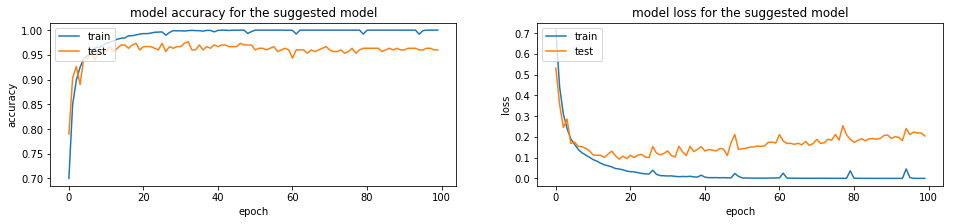

In [12]:
plot_acc_loss(history,'the suggested model')

Summary of results for different size of train data

$$ $$

| Size of train data | train loss | train acc  | val loss | val acc  | test loss | test acc  |    
|--------------------|------------|------------|----------|----------|-----------|-----------|          
| 300                | 0.0067     | 1          | 0.8042   | 0.77     | 0.8042    | 0.7699    | 
| 1000               | 0.0027     | 1          | 0.6304   | 0.84     | 0.63      | 0.8399    | 
| 2000               | 2.664 e-4  | 1          | 0.3069   | 0.93     | 0.3068    | 0.9299    | 
| 5000               | 1.221 e-4  | 1          | 0.2579   | 0.9533   | 0.2579    | 0.9533    | 
| 10000              | 3.2621 e-4 | 1          | 0.2047   | 0.96     | 0.2046    | 0.96      | 

$$ $$ 


# 6    A Regression Problem

## Normalization
    For this regression problem, I noticed that I had before everything to sort somehow the vertices dataset. Here I implement a function that that sorts the vertices according to the sum x+Y .We also substract 0.5 to the values so that the values are centered on zero.

In [169]:
def sort(dataset, r):
    l=dataset.shape[0]
    res = np.zeros((l, 1))
    for i in range(0, l):
        comb = [dataset[i,2*m]+dataset[i,2*m+1] for m in range(0, 3)]
        j = np.argmax(comb)
        k = np.argmin(comb)
        normalized = [dataset[i,2*j]-0.5, dataset[i,2*j+1]-0.5, 
                dataset[i,2*k]-0.5, dataset[i,2*k+1]-0.5, 
                dataset[i,2*(3 - j - k)]-0.5, dataset[i,2*(3 - j - k)+1]-0.5]
        res[i,:] = [normalized[r]]
    return res

In [86]:
#Create the datasets
[X_train, y_train] = generate_dataset_regression(5000, 20)
[X_test, y_test] = generate_test_set_regression()



Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [87]:
size=int(np.sqrt(X_train.shape[1]))
X_train = X_train.reshape((-1,size,size,1))
X_test = X_test.reshape((-1,size,size,1))
y_train1 = [sort(y_train, i) for i in range(0, 6)]
y_test1 = [sort(y_test, i) for i in range(0, 6)]

In [89]:

eps = 1e-5
modelreg = Sequential()
modelreg.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(72,72,1), activation='relu', kernel_regularizer=l2(eps)))
modelreg.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(eps)))
modelreg.add(Flatten())
modelreg.add(Dense(64, activation='relu', kernel_regularizer=l2(eps)))
modelreg.add(Dense(1))
modelreg.compile(optimizer='adam', loss='mean_squared_error')
print(modelreg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 68, 68, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 66, 66, 32)        9248      
_________________________________________________________________
flatten_7 (Flatten)          (None, 139392)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8921152   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 8,931,297
Trainable params: 8,931,297
Non-trainable params: 0
_________________________________________________________________
None


In [90]:

errors = np.ones((6,2))
models = [clone_model(modelreg) for _ in range(0, 6)]
for i in range(0, 6):
    models[i].compile(optimizer='adam', loss='mean_squared_error')
    models[i].fit(X_train, y_train1[i], validation_data=(X_test, y_test1[i]), epochs=20, batch_size=64)
    print("\n\n\n")
    train_error = models[i].evaluate(X_train, y_train1[i], verbose = 0)
    test_error = models[i].evaluate(X_test, y_test1[i], verbose = 0)
    print("Evaluating model %i: train error %.3f - test error %.3f" % (i, train_error, test_error))
    errors[i,:] = [train_error, test_error]
print("\nDone")
        

Train on 5000 samples, validate on 300 samples
Epoch 1/20
5000/5000 [==============================] - 112s 22ms/step - loss: 6.1774 - val_loss: 0.0353
Epoch 2/20
5000/5000 [==============================] - 89s 18ms/step - loss: 0.0233 - val_loss: 0.0191
Epoch 3/20
5000/5000 [==============================] - 112s 22ms/step - loss: 0.0133 - val_loss: 0.0174
Epoch 4/20
5000/5000 [==============================] - 92s 18ms/step - loss: 0.0097 - val_loss: 0.0139
Epoch 5/20
5000/5000 [==============================] - 91s 18ms/step - loss: 0.0081 - val_loss: 0.0128
Epoch 6/20
5000/5000 [==============================] - 77s 15ms/step - loss: 0.0070 - val_loss: 0.0123
Epoch 7/20
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0062 - val_loss: 0.0119
Epoch 8/20
5000/5000 [==============================] - 82s 16ms/step - loss: 0.0055 - val_loss: 0.0114
Epoch 9/20
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0050 - val_loss: 0.0106
Epoch 10/20
500

Epoch 16/20
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0036 - val_loss: 0.0067
Epoch 17/20
5000/5000 [==============================] - 78s 16ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 18/20
5000/5000 [==============================] - 78s 16ms/step - loss: 0.0036 - val_loss: 0.0063
Epoch 19/20
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0034 - val_loss: 0.0068
Epoch 20/20
5000/5000 [==============================] - 78s 16ms/step - loss: 0.0034 - val_loss: 0.0086



Evaluating model 3: train error 0.005 - test error 0.009
Train on 5000 samples, validate on 300 samples
Epoch 1/20
5000/5000 [==============================] - 80s 16ms/step - loss: 2.1874 - val_loss: 0.0593
Epoch 2/20
5000/5000 [==============================] - 77s 15ms/step - loss: 0.0385 - val_loss: 0.0370
Epoch 3/20
5000/5000 [==============================] - 77s 15ms/step - loss: 0.0254 - val_loss: 0.0332
Epoch 4/20
5000/5000 [==============================] - 

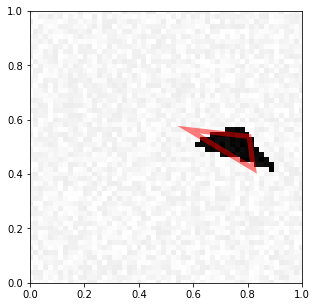

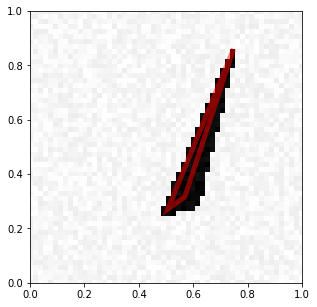

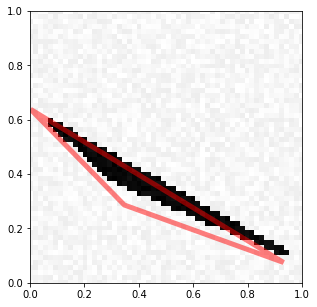

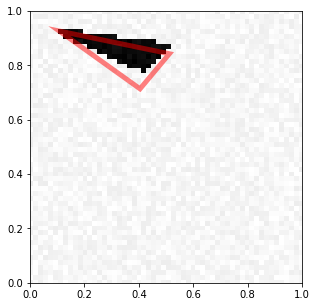

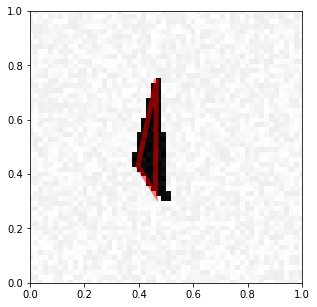

In [91]:
for i in range(0,5):
    predictions = np.array([models[k].predict(X_train)[i,0]+0.5 for k in range(0,6)])
    visualize_prediction(X_train[i,:,:], predictions)

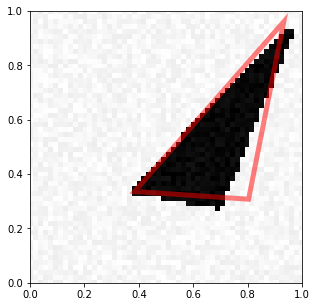

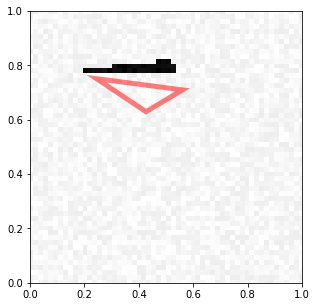

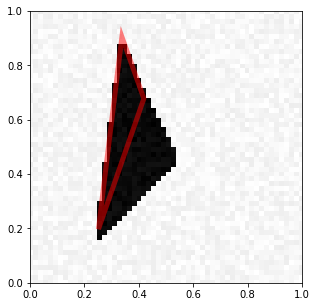

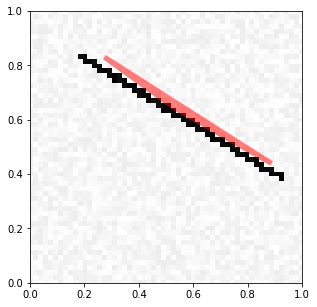

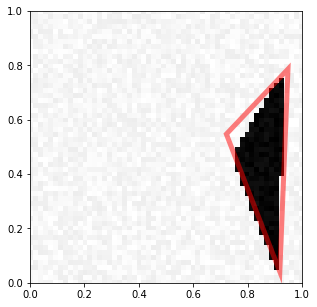

In [92]:
for i in range(0,5):
    predictions = np.array([models[k].predict(X_test)[i,0]+0.5 for k in range(0,6)])
    visualize_prediction(X_test[i,:,:], predictions)

# 7 Image Denoising

Here I created a new function generate_dataset_denoising to generate noisy data. What we really care is whether the pixel is black or white. Hence we can view the denoising task as a segmentation task where we want to put the background in white and the drawing in black. 

In [2]:
X_train_noise,Y_train_noise = generate_dataset_denoising(5000,test=False) 
X_test_noise,Y_test_noise = generate_dataset_denoising(300,test=True) 
size=int(np.sqrt(X_train_noise.shape[1]))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [4]:
X_train_noise = X_train_noise.reshape((-1,size,size,1))
Y_train_noise = Y_train_noise.reshape((-1,size,size,1))

X_test_noise = X_test_noise.reshape((-1,size,size,1))
Y_test_noise = Y_test_noise.reshape((-1,size,size,1))

In [6]:
model =Sequential()

model.add(Convolution2D(64,kernel_size=(3,3),input_shape=(72,72,1,),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(48,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(48,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(32,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(1,kernel_size=(3,3)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

history= model.fit(X_train_noise,Y_train_noise,validation_split=0.1,epochs=10,batch_size=10)

Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 419s 93ms/step - loss: 0.1028 - acc: 0.9909 - val_loss: 0.0071 - val_acc: 0.9991
Epoch 2/10
4500/4500 [==============================] - 404s 90ms/step - loss: 0.0037 - acc: 0.9998 - val_loss: 0.0025 - val_acc: 0.9995
Epoch 3/10
4500/4500 [==============================] - 401s 89ms/step - loss: 0.0015 - acc: 0.9999 - val_loss: 8.2058e-04 - val_acc: 1.0000
Epoch 4/10
4500/4500 [==============================] - 412s 92ms/step - loss: 7.0675e-04 - acc: 1.0000 - val_loss: 4.7927e-04 - val_acc: 1.0000
Epoch 5/10
4500/4500 [==============================] - 428s 95ms/step - loss: 4.4873e-04 - acc: 1.0000 - val_loss: 2.8854e-04 - val_acc: 1.0000
Epoch 6/10
4500/4500 [==============================] - 402s 89ms/step - loss: 7.3978e-04 - acc: 0.9998 - val_loss: 2.5291e-04 - val_acc: 1.0000
Epoch 7/10
4500/4500 [==============================] - 432s 96ms/step - loss: 2.3168e-04 - acc: 1.0000

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 72, 72, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 48)        12336     
_________________________________________________________________
batch_normalization_10 (Batc (None, 72, 72, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 72, 72, 48)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 48)        0         
__________

In [8]:
Y_without_noise = model.predict(X_test_noise)

300/300 [==============================] - 9s 29ms/step
Model outcome [8.284299614994476e-05, 0.9999948628743489]


Text(0.5,1,'Output train denoising')

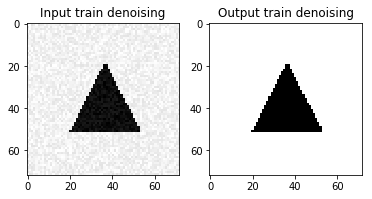

In [14]:
#print outcomes
plt.figure(1)
plt.subplot(121)
plt.imshow(X_train_noise[0].reshape(72,72), cmap='gray')
plt.title('Input train denoising')
plt.subplot(122)
plt.imshow(Y_train_noise[0].reshape(72,72), cmap='gray')
plt.title('Output train denoising')



Text(0.5,1,'Output test denoising')

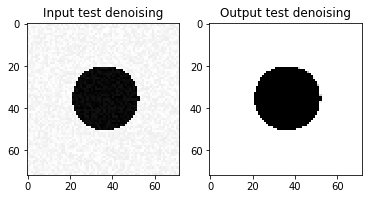

In [18]:
#print outcomes
plt.figure(1)
plt.subplot(121)
plt.imshow(X_test_noise[0].reshape(72,72), cmap='gray')
plt.title('Input test denoising')
plt.subplot(122)
plt.imshow(Y_without_noise[0].reshape(72,72), cmap='gray')
plt.title('Output test denoising')



the outcome is really good ans satisfying